In [1]:
from gamearg import *
from IPython.display import display, Image

## Facts Define

In [2]:
%%file files/test_animal.lp
move(a,b).
move(t,b).
move(b,c).
move(c,d).
move(b,e).
move(d,e).
move(b,f).
move(s,g).
move(f,h).
move(e,i).
move(i,j).
move(i,k).
move(i,l).
move(e,m).
move(o,m).
move(n,m).
move(j,n).
move(i,o).
move(m,o).
move(g,q).
move(h,q).
move(c,q).
move(e,s).
move(f,s).
move(s,t).
move(t,u).
move(b,v).
move(u,v).
move(b,w).
move(d,x).
move(b,y).
move(c,z).

Overwriting files/test_animal.lp


**Note**: For the given example, if you change the `reverse` paramater to `True` you will get 4 possible worlds below; `False` results in 2 possible worlds.

In [3]:
# You only need edit this cell
input_file = "files/test_animal.lp"
keyword = "game" #arg or game depends on the graphvis_settings.json
reverse = False  # whether you want to reverse the edge direction

## Show Plain Graph

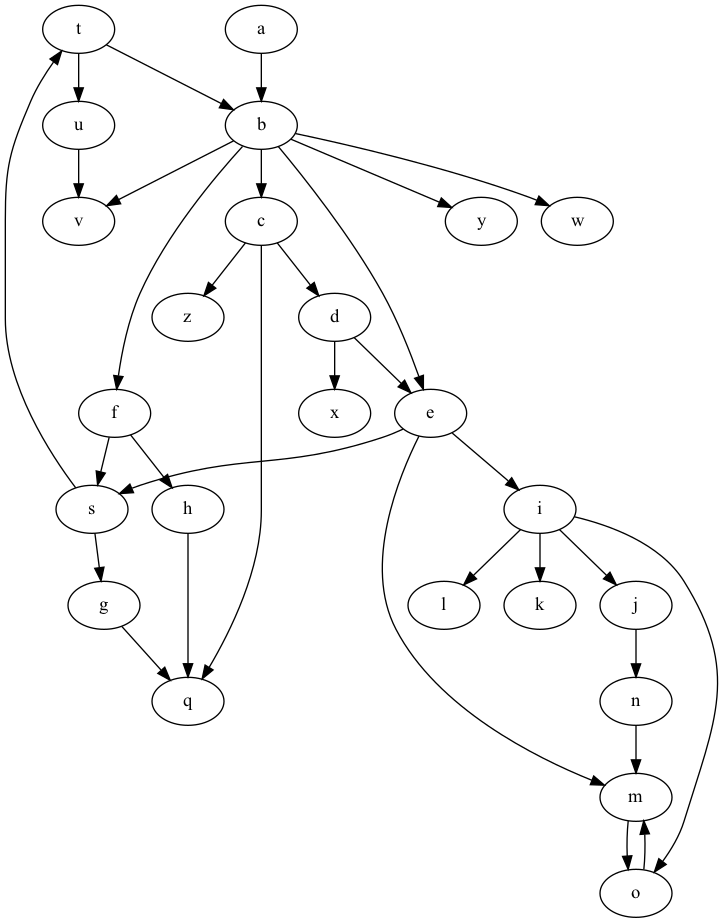

In [4]:
show_plain(input_file, keyword, reverse)

## Well-Founded Semantics

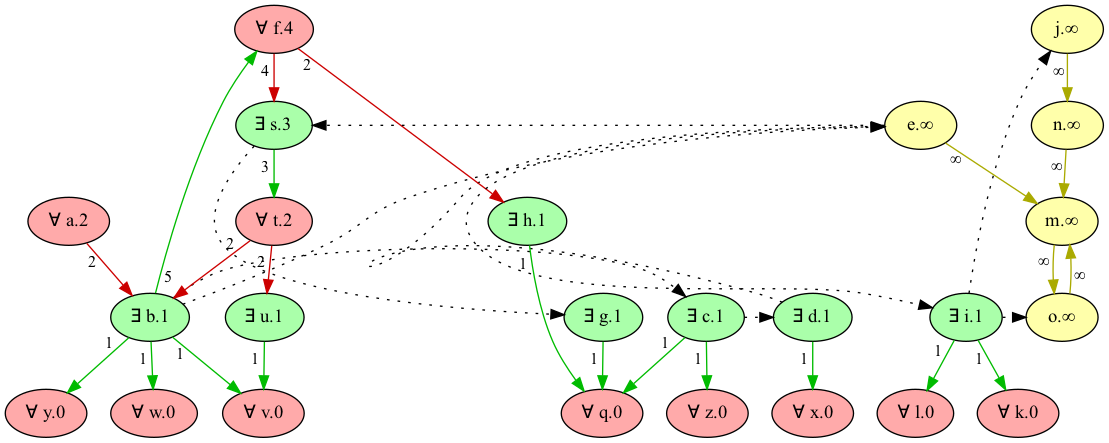

In [5]:
show_wfs(input_file, keyword, reverse)

## Stable Models

In [6]:
show_stb(input_file, keyword, reverse)

In [7]:
wfs_stb_pws, df_wfs_stb = node_stb_cal(input_file, keyword, reverse)

In [8]:
df_wfs_stb

,node,state_id,wfs,pw_1,pw_2
0,v,0,lost,lost,lost
1,z,0,lost,lost,lost
2,y,0,lost,lost,lost
3,x,0,lost,lost,lost
4,w,0,lost,lost,lost
5,q,0,lost,lost,lost
6,l,0,lost,lost,lost
7,k,0,lost,lost,lost
8,u,1,won,won,won
9,b,1,won,won,won


In [9]:
if keyword=="game":
    status_1="lost"
    status_2="won"
else:
    status_1="accepted"
    status_2="defeated"
count_columns = [col for col in df_wfs_stb.columns if col.startswith('pw_')]
df_wfs_stb[f'{status_1}_count'] = df_wfs_stb[count_columns].apply(lambda row: sum(row == status_1), axis=1)
df_wfs_stb[f'{status_2}_count'] = df_wfs_stb[count_columns].apply(lambda row: sum(row == status_2), axis=1)
aggregated_counts = df_wfs_stb.groupby('node').agg({f'{status_1}_count': 'sum', f'{status_2}_count': 'sum'}).reset_index()

aggregated_counts

,node,lost_count,won_count
0,a,2,0
1,b,0,2
2,c,0,2
3,d,0,2
4,e,1,1
5,f,2,0
6,g,0,2
7,h,0,2
8,i,0,2
9,j,1,1
